In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/2021-bis-2025.csv')
df = df.drop(columns='Student ID', errors='ignore')

## Grade distribution in semesters

In [3]:
# Dataframe preparation
df_semester = df.melt(
    var_name='subject', 
    value_name='score'
)

# Extract the semester number (format: x-y-N-z-M)
df_semester['semester'] = (
    df_semester['subject']
    .str.extract(r'^[^-]+-[^-]+-(\d+)-')
    .astype(int)
)

# Calculate the average per semester
semester_avg = df_semester.groupby('semester')['score'].mean()

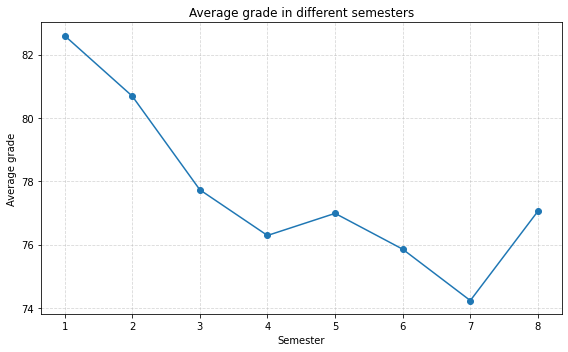

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(semester_avg.index, semester_avg.values, marker='o')
plt.title('Average grade in different semesters')
plt.xlabel('Semester')
plt.ylabel('Average grade')
plt.xticks(semester_avg.index)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Dependencies between types of courses (professional or fundamental) and grades

In [5]:
# Dataframe preparation
df_type1 = df.melt(var_name='subject', value_name='score')

# Extract the type of course (the first chart uo to first minus)
df_type1['type'] = df_type1['subject'].str.extract(r'^([a-zA-Z])')

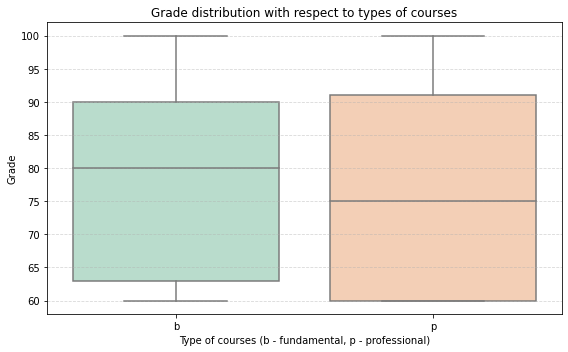

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_type1, x='type', y='score', palette='Pastel2')
plt.title('Grade distribution with respect to types of courses')
plt.xlabel('Type of courses (b - fundamental, p - professional)')
plt.ylabel('Grade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
# Extract the semester number 
df_type1['semester'] = df_type1['subject'].str.extract(r'^[^-]+-[^-]+-(\d+)-')
df_type1['semester'] = df_type1['semester'].astype(int)

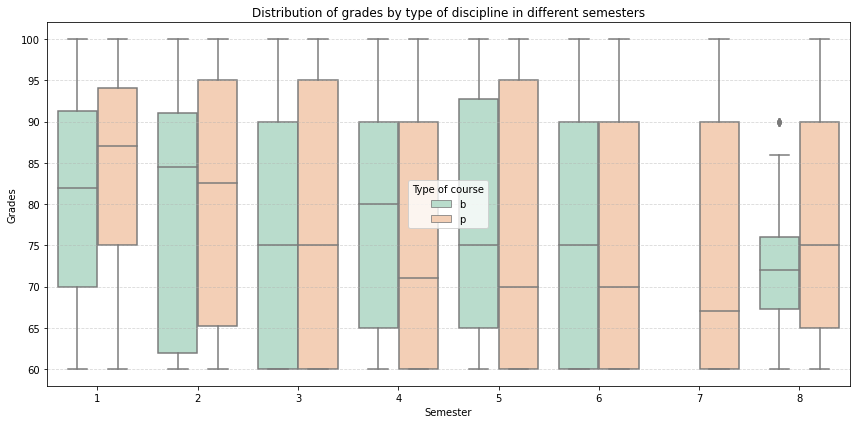

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_type1, x='semester', y='score', hue='type', palette='Pastel2')

plt.title('Distribution of grades by type of discipline in different semesters')
plt.xlabel('Semester')
plt.ylabel('Grades')
plt.legend(title='Type of course')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Dependencies between types of courses (obligatory or selective) and grades

In [9]:
# Dataframe preparation
df_type2 = df.melt(var_name='subject', value_name='score')

# Extract of course type: second letter in the template (f - selective, o - obligatory)
df_type2['requirement'] = df_type2['subject'].str.extract(r'^[a-zA-Z]-([a-zA-Z])')

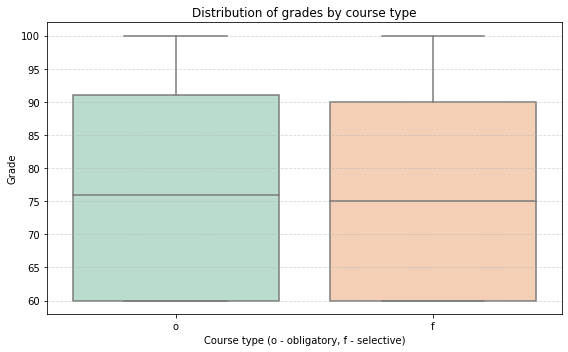

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_type2, x='requirement', y='score', palette='Pastel2')
plt.title('Distribution of grades by course type')
plt.xlabel('Course type (o - obligatory, f - selective)')
plt.ylabel('Grade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
# Extract the semester number 
df_type2['semester'] = df_type2['subject'].str.extract(r'^[a-zA-Z]-[a-zA-Z]-(\d+)-')
df_type2['semester'] = df_type2['semester'].astype(int)

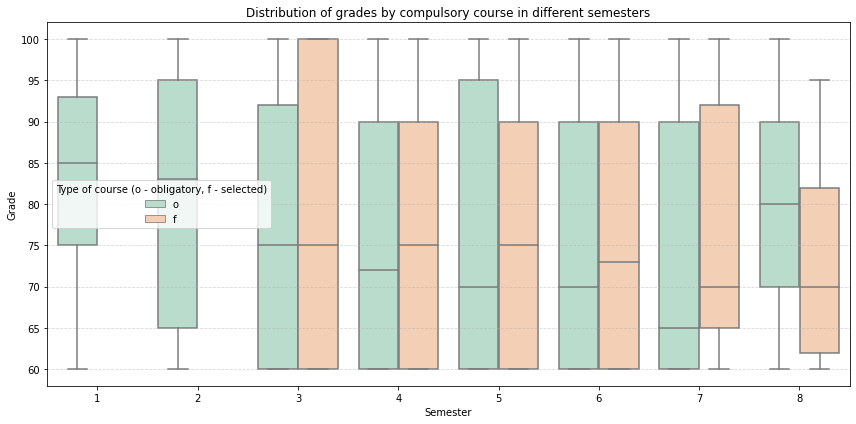

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_type2, x='semester', y='score', hue='requirement', palette='Pastel2')

plt.title('Distribution of grades by compulsory course in different semesters')
plt.xlabel('Semester')
plt.ylabel('Grade')
plt.legend(title='Type of course (o - obligatory, f - selected)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Crosstype dependencies

In [13]:
# Dataframe preparation
df_cross = df.melt(var_name='subject', value_name='score')

# Extract category from the course name (first letter: p - professional, b - fundamental)
df_cross['category'] = df_cross['subject'].str.extract(r'^([a-zA-Z])')

# Extract compulsory of course (second letter: o - obligatory, f - selected)
df_cross['requirement'] = df_cross['subject'].str.extract(r'^[a-zA-Z]-([a-zA-Z])')

# Combining into course types (e.g., p-o, b-f)
df_cross['type_combo'] = df_cross['category'] + '-' + df_cross['requirement']

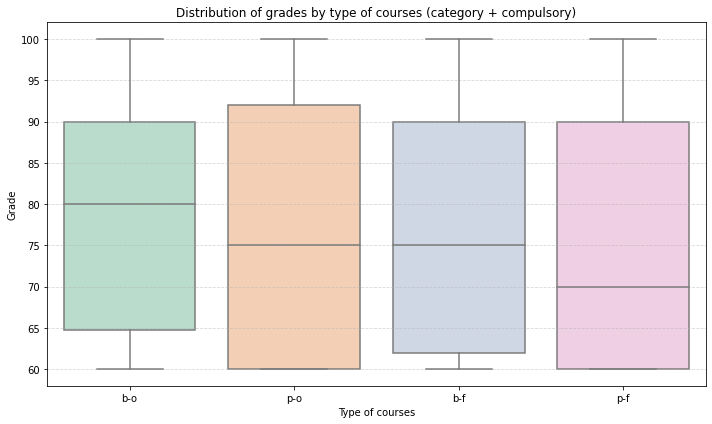

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cross, x='type_combo', y='score', palette='Pastel2')
plt.title('Distribution of grades by type of courses (category + compulsory)')
plt.xlabel('Type of courses')
plt.ylabel('Grade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()